# 第3部　Pythonによるデータ分析｜Pythonで学ぶ統計学入門

## 6章　正規分布とその応用

### ライブラリのインポート

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

### 実装：確率密度

In [2]:
# 円周率
sp.pi

3.142

In [3]:
# 指数関数
sp.exp(1)

2.718

In [4]:
# 「平均4、分散0.64(標準偏差0.8)の正規分布」における、確率変数が3であるときの確率密度
x = 3
mu = 4
sigma = 0.8

1 / (sp.sqrt(2 * sp.pi * sigma**2)) * \
    sp.exp(- ((x - mu)**2) / (2 * sigma**2))

0.228

In [5]:
stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.228

In [6]:
norm_dist = stats.norm(loc = 4, scale = 0.8)
norm_dist.pdf(x = 3)

0.228

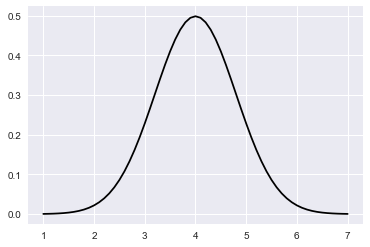

In [7]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(
    x_plot, 
    stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8),
    color = 'black'
)

### 標本がある値以下となる割合

In [8]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 100000)
simulated_sample

array([ 5.299,  3.511,  3.577, ...,  4.065,  4.275,  3.402])

In [10]:
sp.sum(simulated_sample <= 3)

10371

In [11]:
sp.sum(simulated_sample <= 3) / len(simulated_sample)

0.104

### 実装：累積分布関数

In [12]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.106

In [13]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

0.500

### 実装：パーセント点(ある確率になる基準値)

In [14]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.432

In [15]:
sitagawa = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
stats.norm.ppf(loc = 4, scale = 0.8, q = sitagawa)

3.000

In [16]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.000

### t値の標本分布

In [17]:
# 乱数の種
np.random.seed(1)
# t値を格納する入れ物
t_value_array = np.zeros(10000)
# 正規分布クラスのインスタンス
norm_dist = stats.norm(loc = 4, scale = 0.8)
# シミュレーションの実行
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

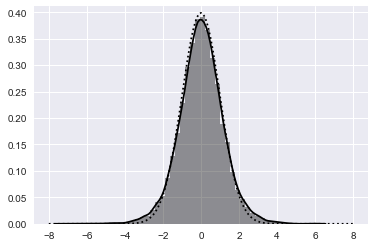

In [18]:
# 標準化された標本平均のヒストグラム
sns.distplot(t_value_array, color = 'black')

# 標準正規分布の確率密度
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x), 
         color = 'black', linestyle = 'dotted')

### 実装：t分布

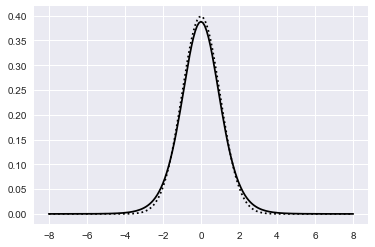

In [19]:
plt.plot(x, stats.norm.pdf(x = x), 
         color = 'black', linestyle = 'dotted')
plt.plot(x, stats.t.pdf(x = x, df = 9), 
         color = 'black')

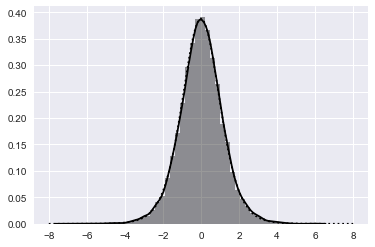

In [20]:
sns.distplot(t_value_array, 
             color = 'black', norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df = 9), 
         color = 'black', linestyle = 'dotted')